<a href="https://colab.research.google.com/github/Geetha495/Unsupervised-Classification-EP4130/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Data

## K-Means

### HeatMap

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


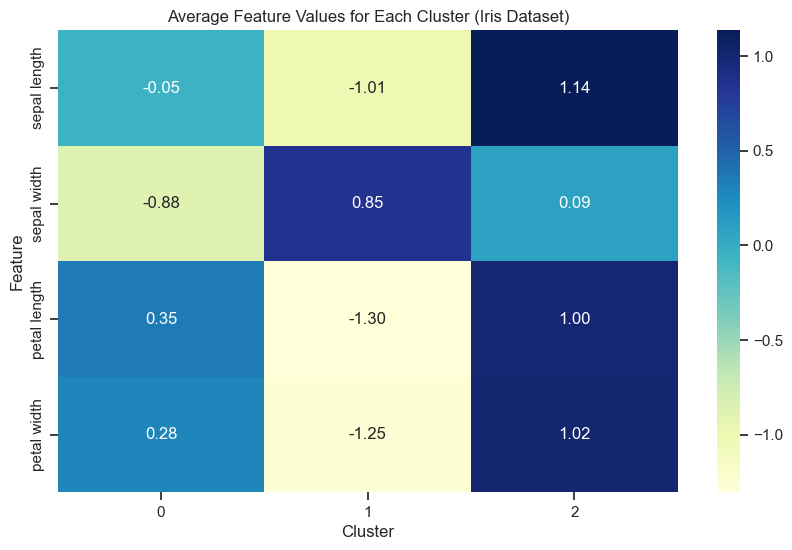

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
columns = ['sepal length',
 'sepal width',
 'petal length',
 'petal width']

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply K-means clustering
num_clusters = 3  # Since the Iris dataset has 3 classes
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(X_normalized)

# Add cluster labels to the dataset
df = pd.DataFrame(X_normalized, columns=columns)
df['Cluster'] = labels

# Calculate average feature values for each cluster
cluster_avg = df.groupby('Cluster').mean()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_avg.transpose(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Feature Values for Each Cluster (Iris Dataset)')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.xticks(ticks=np.arange(num_clusters) + 0.5, labels=np.arange(num_clusters))
plt.show()


### Pair plot

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


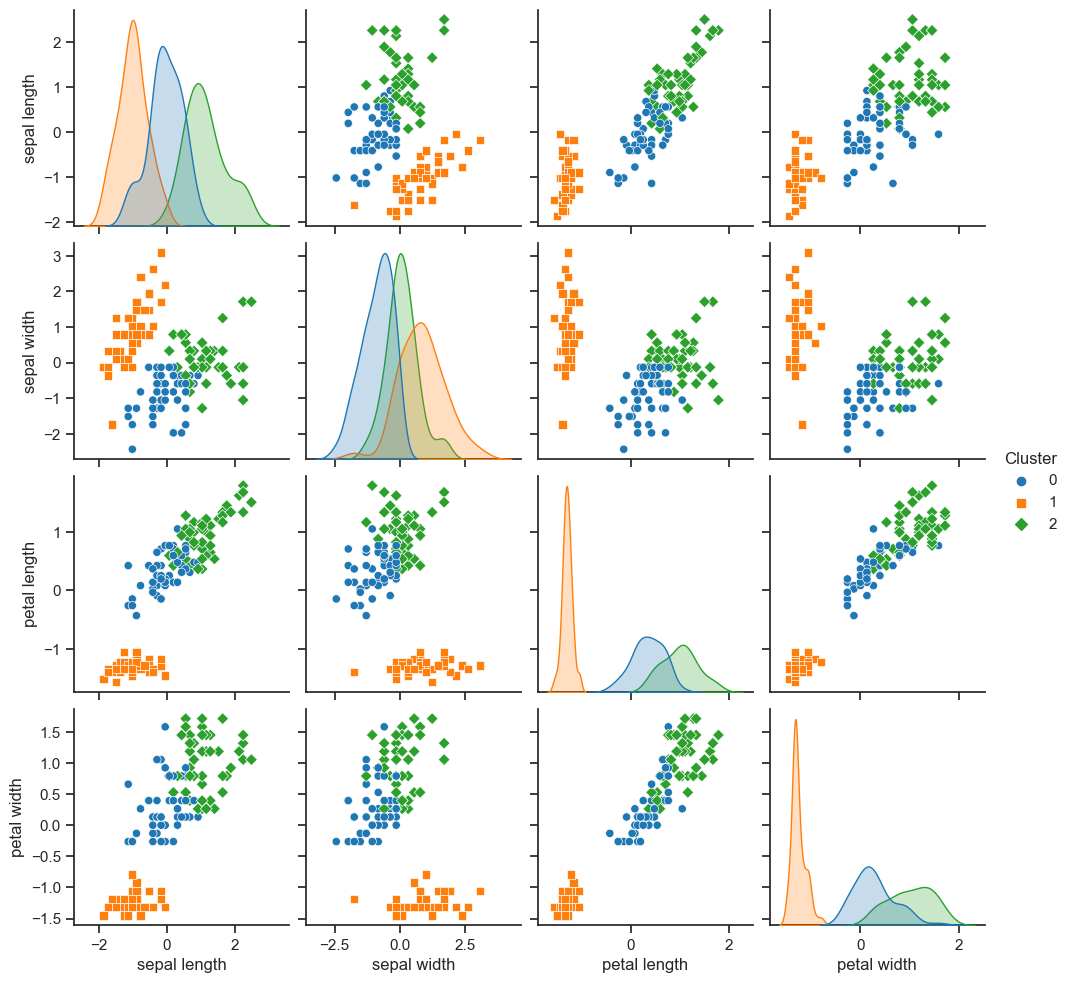

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
columns = ['sepal length',
 'sepal width',
 'petal length',
 'petal width']


# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply K-means clustering
num_clusters = 3  # Since the Iris dataset has 3 classes
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(X_normalized)

# Add cluster labels to the dataset
df = pd.DataFrame(X_normalized, columns=columns)
df['Cluster'] = labels

# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Create scatter plots for each pair of features
sns.set(style="ticks")
sns.pairplot(df, hue="Cluster", palette='tab10',markers=["o", "s", "D"])

plt.show()


### t-SNE comparision against ground truth labels

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


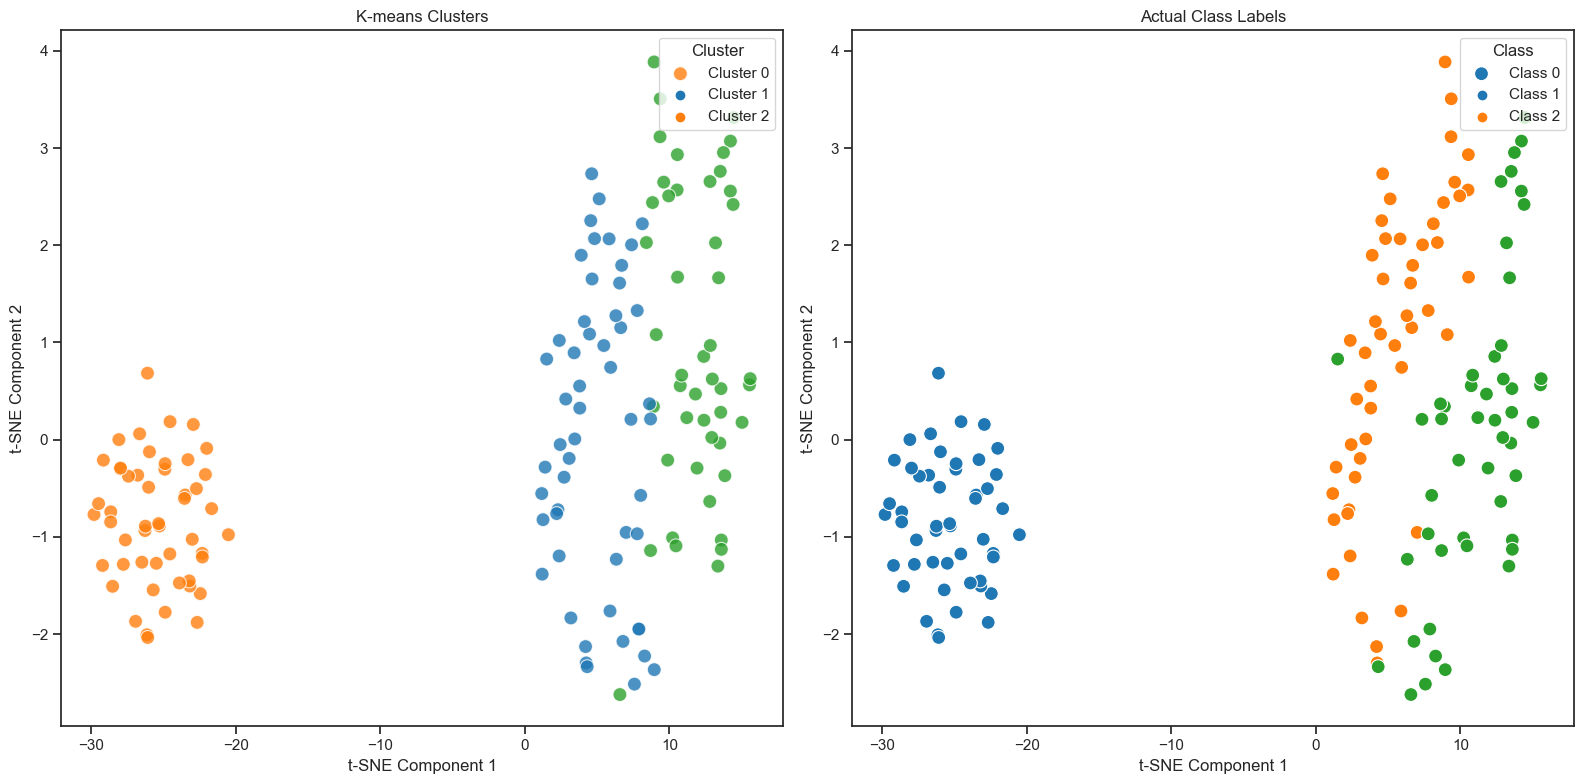

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_normalized)

# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(X_normalized)

# Define colors for actual class labels
class_colors = sns.color_palette("Set1", n_colors=len(np.unique(y)))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot t-SNE representation with K-means cluster labels
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='tab10', legend='full', s=100, alpha=0.8, ax=axes[0])
# sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette="tab10", legend='full', s=100, alpha=0.8)

axes[0].set_title('K-means Clusters')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')
axes[0].legend(title='Cluster', loc='upper right', labels=[f'Cluster {i}' for i in range(num_clusters)])

# Plot t-SNE representation with actual class labels
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', legend='full', s=100, ax=axes[1])
axes[1].set_title('Actual Class Labels')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')
axes[1].legend(title='Class', loc='upper right', labels=[f'Class {i}' for i in range(len(np.unique(y)))])

plt.tight_layout()
plt.show()


## Hierarchical Clustering

### Dendrogram Plot

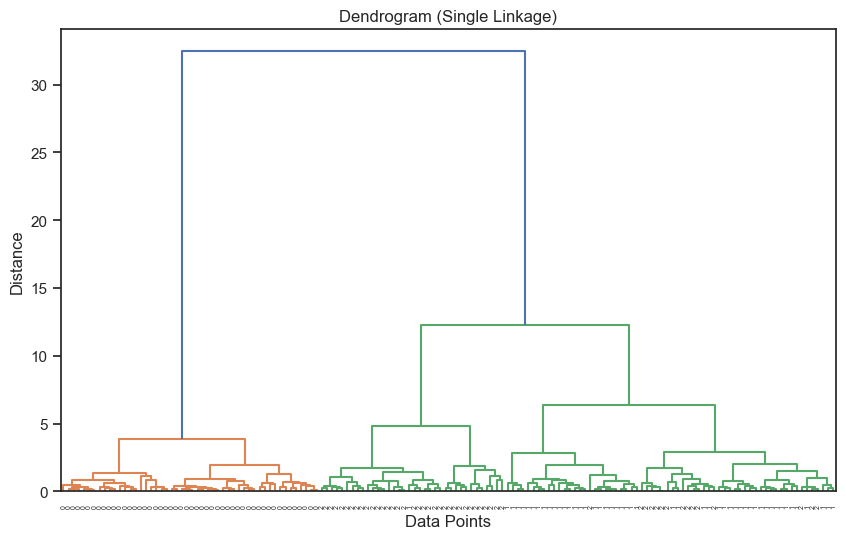

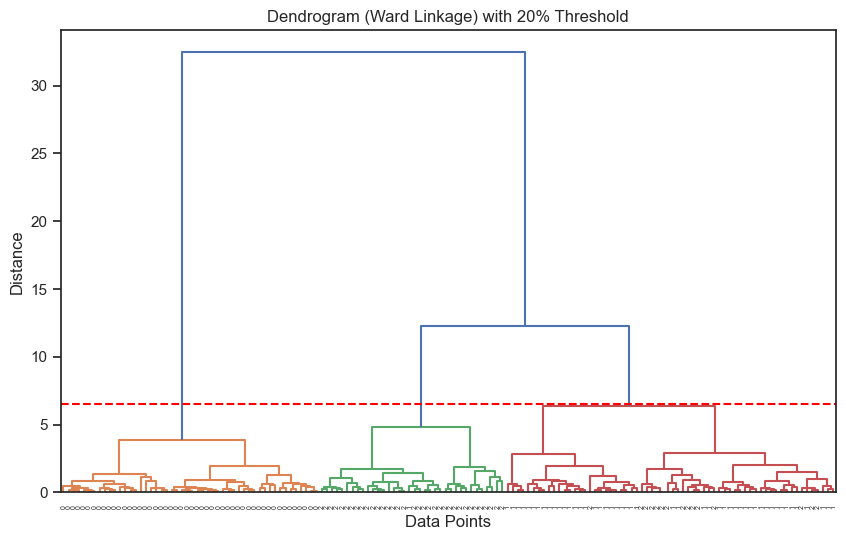

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Perform hierarchical clustering with single linkage
distances = linkage(data, method='ward')

# Create a dendrogram plot
plt.figure(figsize=(10, 6))
dendrogram(distances, labels=iris.target)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Calculate the maximum height
max_height = distances[-1, 2]  # Last row, second last column

# Apply the 20% rule (adjust threshold as needed)
threshold = max_height * 0.2


# Count the number of clusters based on threshold
plt.figure(figsize=(10, 6))
clusters = dendrogram(distances, color_threshold=threshold, labels=iris.target)
plt.title("Dendrogram (Ward Linkage) with 20% Threshold")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.axhline(y=threshold, color='red', linestyle='--')  # Highlight threshold line
plt.show()

# Extract the number of clusters based on color threshold
n_clusters = clusters['color_list'].count('black')


# Synthetic Data

## K-Means

### Varying number of clusters

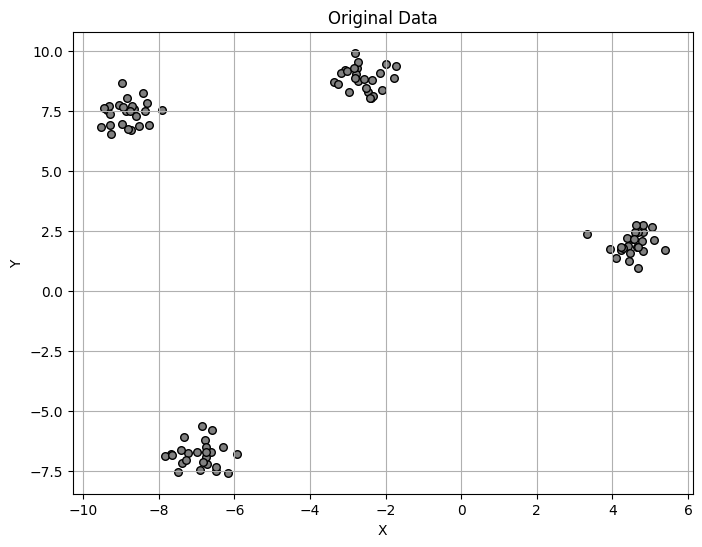

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

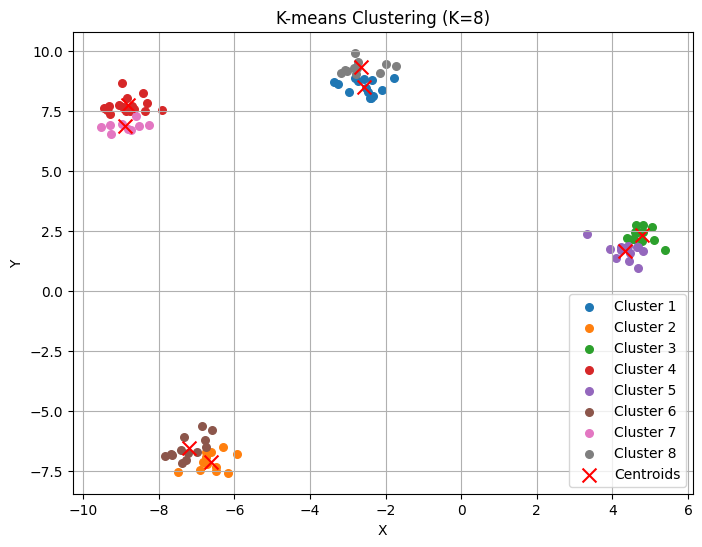

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation

# Generate sample data with 10 clusters
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.5, random_state=42)

# Create a scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', s=30, edgecolors='k')
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
values = []
# Function to update the plot for each frame of the animation
def update(frame):
    plt.cla()
    k = frame + 1  # Vary k from 1 to 15
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sm = 0
    for i in range(k):
        plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], s=30, label=f'Cluster {i+1}')
        sm += ((X[labels==i]-centroids[i])**2).sum()
    values.append(kmeans.inertia_)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
    plt.title(f'K-means Clustering (K={k})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)

# Create the animation
fig = plt.figure(figsize=(8, 6))
ani = FuncAnimation(fig, update, frames=8, repeat=False)

# Save the animation as a gif file (optional)
ani.save('kmeans_animation.gif', writer='imagemagick', fps=1)

plt.show()


#### Elbow plot

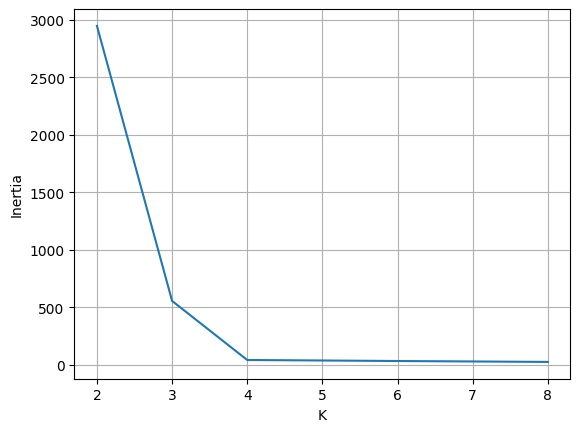

In [ ]:
st = 2
xax = np.arange(st,9)
plt.xticks(xax)
plt.plot(xax,values[st:])
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Inertia')

plt.show()

### K-Means++ Initialization

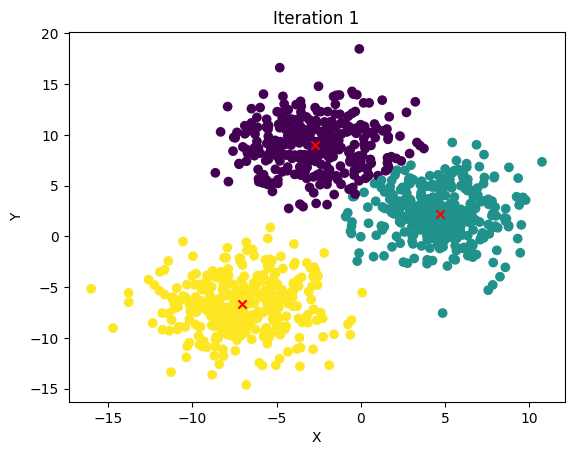

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs, load_iris
from sklearn.manifold import TSNE

# Function to calculate Euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Function to assign points to nearest centroid
def assign_points(data, centroids):
    clusters = []
    for point in data:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

tsne = TSNE(n_components=2, random_state=0)

# Function to update centroids
def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

# Generate synthetic data using make_blobs
data, _ = make_blobs(n_samples=1000, centers=3, cluster_std=1.5, random_state=42)

data += 2*np.random.randn(data.shape[0], data.shape[1])

# Number of clusters
k = 3


def kmeans_plusplus_init(X, num_clusters):
    # Initialize centroids list with the first centroid randomly chosen
    centroids = [X[np.random.randint(X.shape[0])]]

    # Iterate to choose remaining centroids
    for _ in range(1, num_clusters):
        # Compute distances from each data point to the nearest centroid
        distances = np.array([min(np.linalg.norm(x - c)**2 for c in centroids) for x in X])

        # Assign probabilities to data points based on the squared distances
        probabilities = distances / distances.sum()

        # Choose the next centroid randomly with probability proportional to the squared distance
        next_centroid_index = np.random.choice(np.arange(len(X)), p=probabilities)
        next_centroid = X[next_centroid_index]

        # Add the next centroid to the list of centroids
        centroids.append(next_centroid)

    return np.array(centroids)

# # Randomly initialize centroids
# initial_centroids = np.random.choice(range(len(data)), k, replace=False)
# centroids = data[initial_centroids]

centroids = kmeans_plusplus_init(data, k)

# Create a figure and axis
fig, ax = plt.subplots()

# Function to update plot
def update_plot(frame):
    ax.clear()
    clusters = assign_points(data, centroids)

    # Plot the current state

    ax.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')

    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
    ax.set_title(f"Iteration {frame + 1}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Update centroids
    new_centroids = update_centroids(data, clusters, k)

    centroids[:] = new_centroids

# Create animation
ani = FuncAnimation(fig, update_plot, frames=range(10), interval=500)

# Save animation as GIF
ani.save('kmeans-plus.gif', writer='pillow')

## Hierarchical Clustering Progress Animation

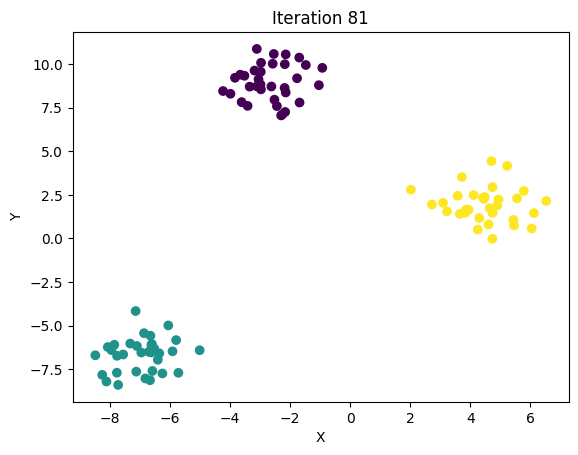

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data using make_blobs
data, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Number of clusters
n_clusters = 3

# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the agglomerative clustering object
agglomerative = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

# Fit the initial clusters
initial_clusters = agglomerative.fit_predict(data)

# Function to update plot
def update_plot(frame):


    # Fit the agglomerative clustering with different distances
    agglomerative.distance_threshold = frame / 10.0

    # Get the current clusters
    clusters = agglomerative.fit_predict(data)

    # Plot the current state
    if frame%5==0:
      ax.clear()
      ax.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
      ax.set_title(f"Iteration {frame + 1}")
      ax.set_xlabel('X')
      ax.set_ylabel('Y')

# Create animation
ani = FuncAnimation(fig, update_plot, frames=range(1, 81), interval=100)

# Save animation as GIF
ani.save('hierarchical_clustering.gif', writer='pillow')

plt.show()


In [ ]:
from PIL import Image

def extract_frames(gif_path, output_dir):
    # Open the GIF
    gif = Image.open(gif_path)

    # Iterate over each frame
    for frame_index in range(gif.n_frames):
        # Go to the current frame
        gif.seek(frame_index)

        # Convert the frame to RGB
        frame_rgb = gif.convert("RGB")

        # Save the frame as an image
        frame_rgb.save(f"{output_dir}/frame_{frame_index}.png")

    # Close the GIF
    gif.close()

# Usage example
gif_path = "hierarchical_clustering-good.gif"
output_dir = "hierarchical_clustering-good"
extract_frames(gif_path, output_dir)

# Fashion-MNIST

## Preview of dataset

<Figure size 1000x1000 with 0 Axes>

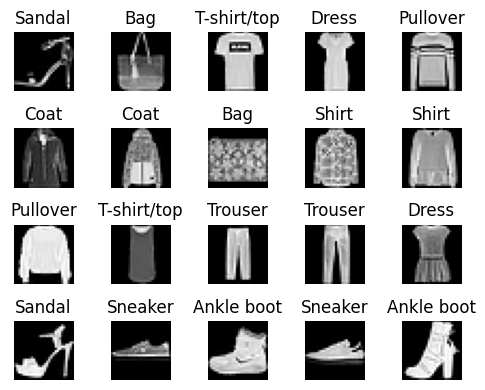

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import random


# Load Fashion MNIST dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Initialize plot
plt.figure(figsize=(10, 10))


# Loop through each class
arr = []
for i in range(10):
    # Find indices of images with current class
    class_indices = np.where(train_labels == i)[0][:2]

    # Plot each image in a grid
    for j, idx in enumerate(class_indices):
        arr.append([i,idx])
        # plt.subplot(4, 5, i * 2 + j + 1)
        # plt.xticks([])
        # plt.yticks([])
        # plt.grid(False)
        # plt.imshow(train_images[idx], cmap=plt.cm.binary)
        # plt.xlabel(class_names[i])

random.shuffle(arr)

# Convert the permutations generator to a list
# perm_list = list(perms)

import matplotlib.pyplot as plt

def plot_images(indices):
    num_images = len(indices)
    num_rows = 4
    num_cols = 5

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 4))
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            class_lb = indices[i][0]
            idx = indices[i][1]
            I = train_images[idx]
            ax.imshow(I, cmap='gray')
            ax.set_title(class_names[class_lb])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming train_images is a list of images and class_names is a list of corresponding class names
# And indices is a list of 20 indices
plot_images(arr)

# Show the plot
plt.tight_layout()
plt.show()

## Centroid Visualization

4422102/4422102 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


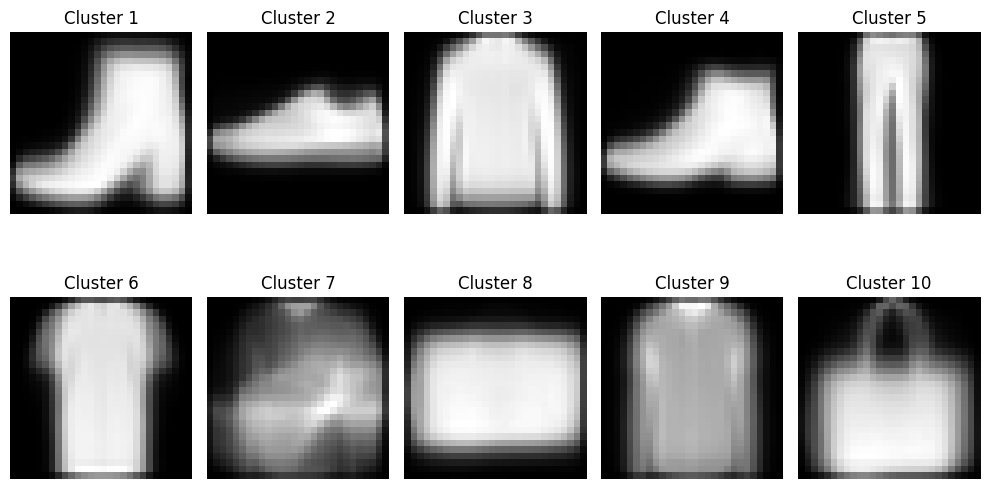

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Fashion MNIST data
# (You'll need to replace this with your actual data loading code)
from tensorflow.keras.datasets import fashion_mnist
(X_train, _), _ = fashion_mnist.load_data()

# Reshape the data to 2D array
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Apply K-means clustering
n_clusters = 10  # You can choose any number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_flat)

# Get cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Visualize cluster centroids as heatmaps
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cluster_centroids[i].reshape(28, 28), cmap='gray')
    plt.title(f'Cluster {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


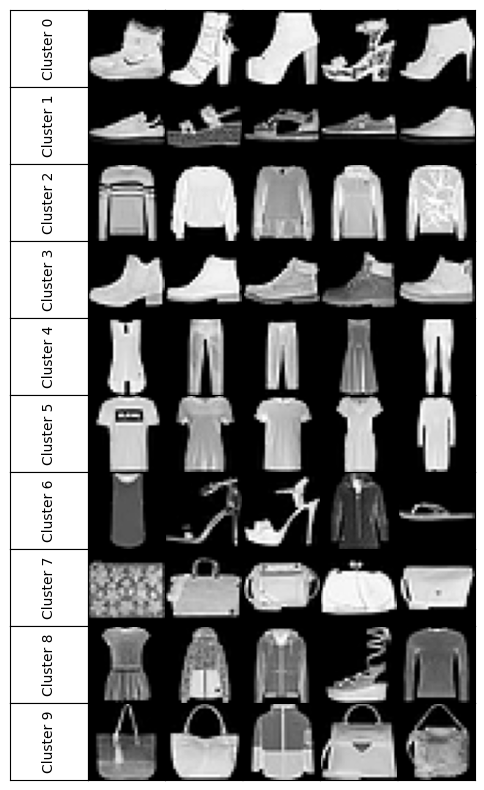

In [ ]:
# Get cluster labels
cluster_labels = kmeans.labels_

# Calculate mean images for each cluster
mean_images = []
k = n_clusters
for cluster_id in range(k):
    cluster_samples = X_train[cluster_labels == cluster_id]
    mean_image = np.mean(cluster_samples, axis=0)
    mean_images.append(mean_image)

# Visualize clusters
num_samples_to_show = 5  # Number of samples to show from each cluster

# Calculate number of rows and columns for the grid
num_cols = num_samples_to_show + 1  # Add two columns: one for mean image and one for text
num_rows = k
total_images = num_cols*num_rows

# Create a single axis
fig, ax = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))

# Flatten the axis array to simplify indexing
ax = ax.flatten()

for a in ax:
    a.set_xticks([])
    a.set_yticks([])


# Plot mean images and each image from each cluster
for cluster_id in range(k):
    # Plot mean image
    # ax[cluster_id * num_cols + 1].imshow(mean_images[cluster_id], cmap='gray')
    # ax[1].set_title('Mean')

    # Plot sample images
    cluster_samples = X_train[cluster_labels == cluster_id][:num_samples_to_show]
    for i in range(num_samples_to_show):
        ax[cluster_id * num_cols + i + 1].imshow(cluster_samples[i], cmap='gray')

# Add text for each row in a new column at the front
for cluster_id in range(k):
    ax[cluster_id * num_cols].text(0.5, 0.5, f'Cluster {cluster_id}', ha='center', va='center', rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)  # Remove space between subplots
plt.show()


# CIFAR-10 dataset

## Data Preview

170498071/170498071 [==============================] - 3s 0us/step


<Figure size 2000x2000 with 0 Axes>

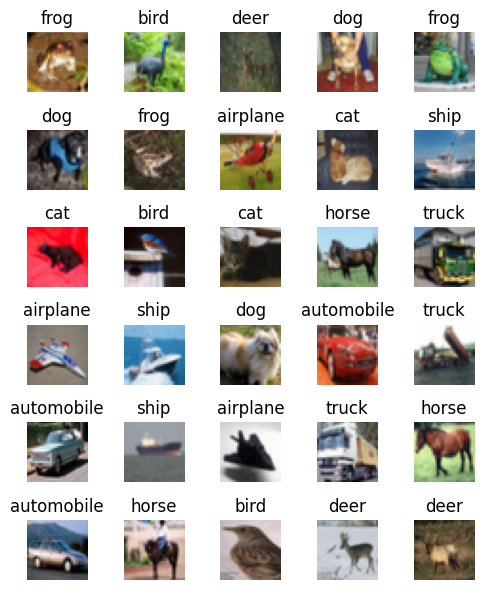

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(train_images, train_labels), (_, _) = cifar10.load_data()

# Define classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Initialize plot
plt.figure(figsize=(20, 20))


# Loop through each class
arr = []
for i in range(10):
    # Find indices of images with current class
    class_indices = np.where(train_labels == i)[0][:3]

    # Plot each image in a grid
    for j, idx in enumerate(class_indices):
        arr.append([i,idx])
        # plt.subplot(4, 5, i * 2 + j + 1)
        # plt.xticks([])
        # plt.yticks([])
        # plt.grid(False)
        # plt.imshow(train_images[idx], cmap=plt.cm.binary)
        # plt.xlabel(class_names[i])

random.shuffle(arr)

# Convert the permutations generator to a list
# perm_list = list(perms)

import matplotlib.pyplot as plt

def plot_images(indices):
    num_images = len(indices)
    num_rows = 6
    num_cols = 5

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5,6))
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            class_lb = indices[i][0]
            idx = indices[i][1]
            I = train_images[idx]
            ax.imshow(I)
            ax.set_title(class_names[class_lb])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming train_images is a list of images and class_names is a list of corresponding class names
# And indices is a list of 20 indices
plot_images(arr)

# Show the plot
plt.tight_layout()
plt.show()

## K-Means on CIFAR10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, _), (_, _) = cifar10.load_data()

# Reshape and normalize the data
x_train_flat = x_train.reshape(-1, 32 * 32 * 3) / 255.0

# Choose number of clusters
k = 10  # Number of classes in CIFAR-10

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_train_flat)

# Get cluster labels
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


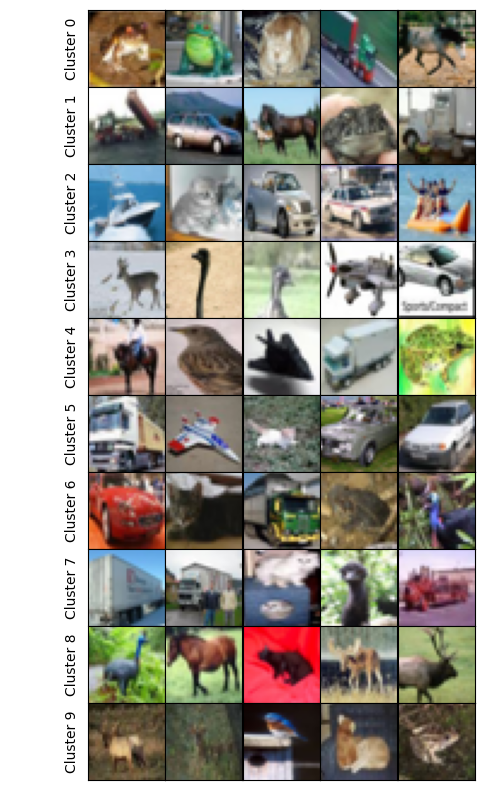

In [ ]:
import matplotlib.pyplot as plt
num_samples_to_show = 5
# Calculate number of rows and columns for the grid
num_cols = num_samples_to_show + 1  # Add one column for text
num_rows = k
total_images = num_cols*num_rows

# Create a single axis
fig, ax = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))

# Flatten the axis array to simplify indexing
ax = ax.flatten()

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

# Remove border of the first column
for i in range(0, total_images, num_cols):
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

for cluster_id in range(k):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    num_samples = min(len(cluster_indices), 5)  # Limit to at most 5 samples per cluster
    # fig, axes = plt.subplots(1, num_samples, figsize=(5, 2))
    # fig.suptitle(f'Cluster {cluster_id}', fontsize=16)
    for i, idx in enumerate(cluster_indices[:num_samples]):
        img = x_train[idx]
        # img = img / 2 + 0.5  # Unnormalize
        # img = np.transpose(img, (1, 2, 0))
        ax[cluster_id * num_cols + i + 1].imshow(img)

# Add text for each row in a new column at the front
for cluster_id in range(k):
    ax[cluster_id * num_cols].text(0.8, 0.5, f'Cluster {cluster_id}', ha='center', va='center', rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)  # Remove space between subplots
plt.show()

# Drawbacks

## Sensitive to Outliers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


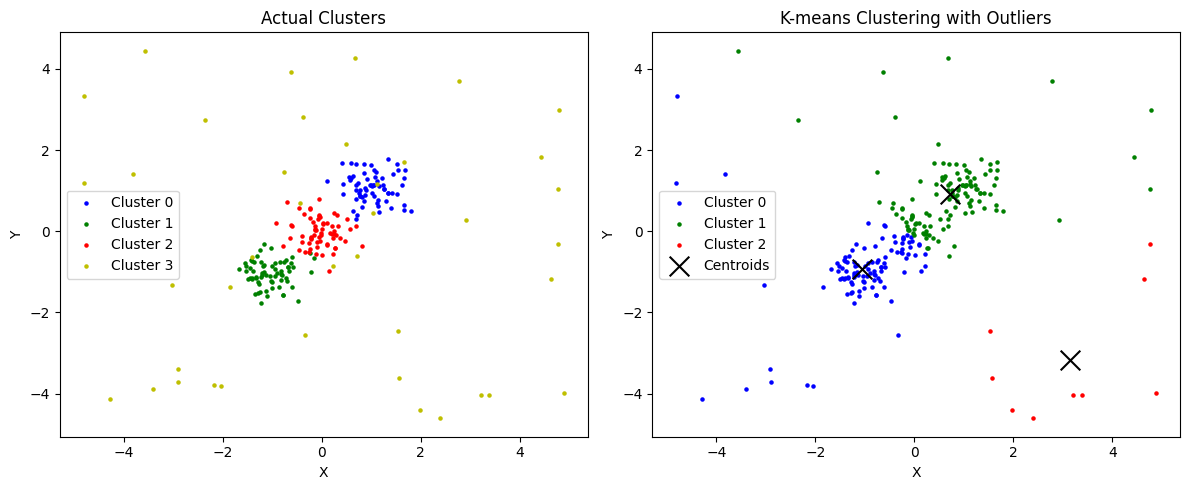

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with two clusters
np.random.seed(0)
# Generate synthetic data with outliers
centers = [[1, 1], [-1, -1], [0,0]]
data, actual_labels = make_blobs(n_samples=200, centers=centers, cluster_std=0.35, random_state=0)
# Add outliers
outliers = np.random.uniform(low=-5, high=5, size=(40, 2))
data = np.vstack([data, outliers])

outlier_labels = np.ones((40,))*3

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)
kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

total_labels = np.hstack([actual_labels, outlier_labels])

# Define colors for each cluster
colors = ['b', 'g', 'r', 'y']

# Plot the clustered data
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot with actual label-colored clusters
for i in range(4):
    axs[0].scatter(data[total_labels == i, 0], data[total_labels == i, 1], c=colors[i], label=f'Cluster {i}', s=5)

axs[0].set_title('Actual Clusters')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()

# Plot with k-means clustering result
for i in range(len(centroids)):
    axs[1].scatter(data[kmeans_labels == i, 0], data[kmeans_labels == i, 1], c=colors[i], label=f'Cluster {i}', s=5)

axs[1].scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='black', label='Centroids')
axs[1].set_title('K-means Clustering with Outliers')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].legend()

plt.tight_layout()
plt.show()


## Inefficient for non-spherical data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-477e6920201e>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


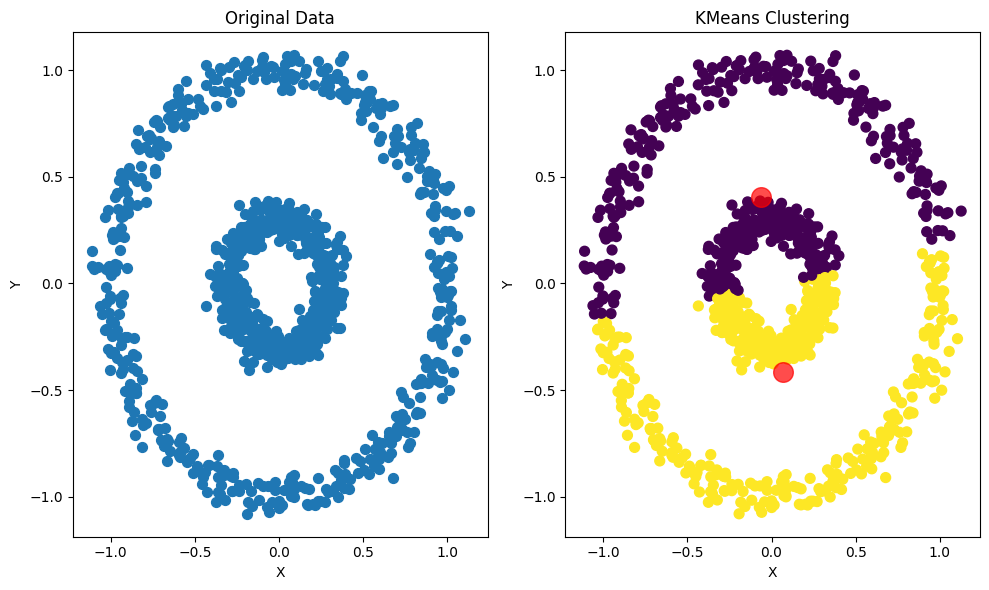

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot original data and KMeans clusters
plt.figure(figsize=(10, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')

# Plot KMeans clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.7)
plt.title('KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()